In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,603 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [ ]:
# 데이터 가져오기
data = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_제주_202212.csv')
data

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
0      21706657          동경부동산  NaN         L      부동산       L01       부동산중개   
1      17174231  에프케이알레그리아호텔제주  NaN         O       숙박       O01       호텔/콘도   
2      17173846       아빠가닭튀기는집  NaN         Q       음식       Q09        유흥주점   
3      20823993         현임옥헤어샵  NaN         F    생활서비스       F01     이/미용/건강   
4      15517264          금실홈패션  NaN         D       소매       D07  가정/주방/인테리어   
...         ...            ...  ...       ...      ...       ...         ...   
54289  19081186     파워공인중개사사무소  NaN         L      부동산       L01       부동산중개   
54290  19082384            에이룸  NaN         Q       음식       Q01          한식   
54291  19082788           삼도밥상  NaN         Q       음식       Q01          한식   
54292  19075000        한우소머리국밥  NaN         Q       음식       Q01          한식   
54293  19078777          엄마의밥상  NaN         Q       음식       Q01          한식   

      상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0        L01A01      부동산중개   L68221  ...  5013010100102900005031397   
1        O01A01      호텔/콘도      NaN  ...  5013010100103190002000005   
2        Q09A01      호프/맥주   I56219  ...  5011025024011990003006865   
3        F01A01      여성미용실   S96112  ...  5011012200126130007064597   
4        D07A09        홈패션   G47411  ...  5011010800101350009019203   
...         ...        ...      ...  ...                        ...   
54289    L01A01      부동산중개   L68221  ...  5011013700102600039000001   
54290    Q01A01  한식/백반/한정식   I56111  ...  5011010400119900014000001   
54291    Q01A01  한식/백반/한정식   I56111  ...  5011010600100730001021768   
54292    Q01A01  한식/백반/한정식   I56111  ...  5013032021106340041000001   
54293    Q01A01  한식/백반/한정식   I56111  ...  5011010400111780001044331   

                건물명                           도로명주소   구우편번호    신우편번호  동정보  \
0             동문레코드           제주특별자치도 서귀포시 중앙로 70-1  697843  63591.0  NaN   
1      비스타케이호텔(천지연)         제주특별자치도 서귀포시 중앙로47번길 25  697844  63592.0  NaN   
2               NaN        제주특별자치도 제주시 한림읍 한림중앙로 26  695932  63032.0  NaN   
3               NaN            제주특별자치도 제주시 정존11길 29  690805  63102.0  NaN   
4            서문공설시장          제주특별자치도 제주시 서문로4길 13-2  690819  63154.0  NaN   
...             ...                             ...     ...      ...  ...   
54289  연동태홍누리안3차아파트              제주특별자치도 제주시 삼무로 15  690813  63125.0  NaN   
54290           NaN          제주특별자치도 제주시 남광로2길 17-7  690851  63231.0  NaN   
54291           NaN              제주특별자치도 제주시 관덕로 32  690809  63168.0  NaN   
54292           NaN  제주특별자치도 서귀포시 표선면 표선중앙로90번길 9-2  699914  63629.0  NaN   
54293           NaN            제주특별자치도 제주시 광양11길 22  690827  63209.0  NaN   

       층정보  호정보          경도         위도  
0      NaN  NaN  126.561556  33.250877  
1      NaN  NaN  126.559015  33.248179  
2      NaN  NaN  126.264860  33.412363  
3      NaN  NaN  126.474887  33.485978  
4      NaN  NaN  126.517956  33.511339  
...    ...  ...         ...        ...  
54289  NaN  NaN  126.488447  33.490174  
54290    1  NaN  126.538847  33.491446  
54291    1  NaN  126.522675  33.512946  
54292  NaN  NaN  126.833128  33.324772  
54293  NaN  NaN  126.532401  33.499781  

[54294 rows x 39 columns]

In [ ]:
# 데이터 null값 확인
data.isnull().sum()

상가업소번호           0
상호명              0
지점명          46243
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      5023
표준산업분류명       5023
시도코드             0
시도명              0
시군구코드            0
시군구명             0
행정동코드            0
행정동명             0
법정동코드            0
법정동명             0
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        10752
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        43758
건물관리번호           0
건물명          41355
도로명주소            0
구우편번호            0
신우편번호            4
동정보          51767
층정보          35161
호정보          54294
경도               0
위도               0
dtype: int64

In [ ]:
# Null 값이 100개 이상인 열을 제외
filtered_data_kr = data.dropna(axis=1, thresh=data.shape[0] - 100)

# 원본 데이터와 필터링된 데이터의 열 개수 확인
original_columns_count_kr = data.shape[1]
filtered_columns_count_kr = filtered_data_kr.shape[1]

original_columns_count_kr, filtered_columns_count_kr, filtered_data_kr.columns


(39,
 30,
 Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
        '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
        '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
        '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
        '위도'],
       dtype='object'))

In [ ]:
# 제주지역 업종별 분포

In [ ]:
# '상권업종대분류명' 별로 '상호명'의 개수를 세기
business_type_counts = data.groupby('상권업종대분류명').count()['상호명']

business_type_counts

상권업종대분류명
관광/여가/오락     1042
부동산          1574
생활서비스        7856
소매          14366
숙박           3993
스포츠           614
음식          21903
학문/교육        2946
Name: 상호명, dtype: int64

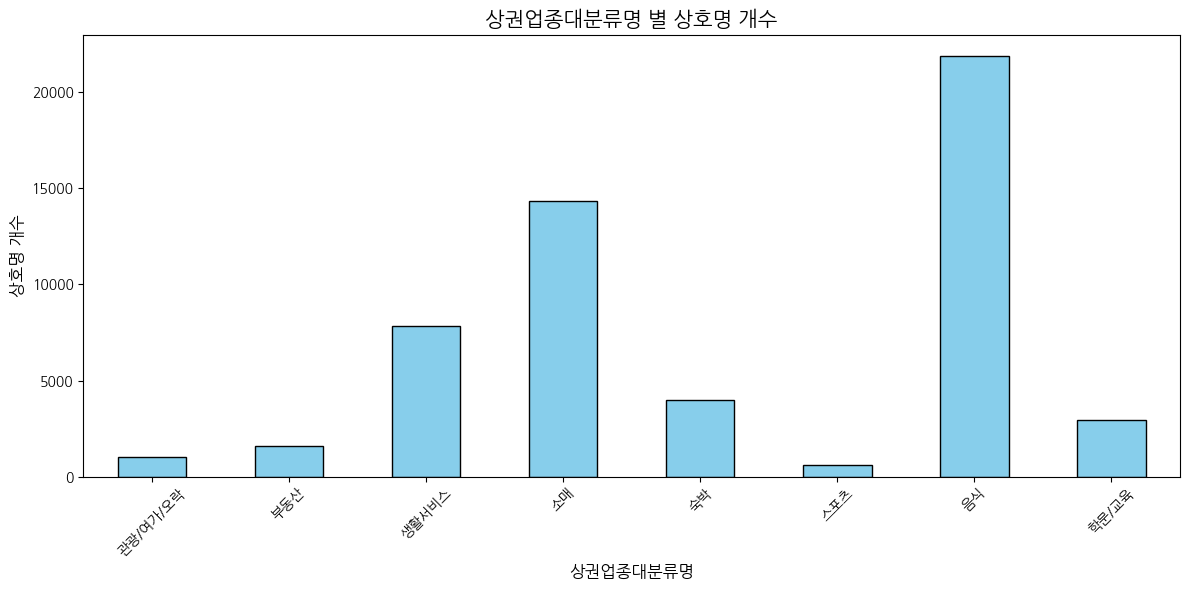

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
# 상권업종대분류명 별 상호명 개수 그래프 그리기
plt.figure(figsize=(12, 6))
business_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('상권업종대분류명 별 상호명 개수', fontsize=15)
plt.xlabel('상권업종대분류명', fontsize=12)
plt.ylabel('상호명 개수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
# '시군구명'과 '상권업종대분류명' 별로 '상호명'의 개수를 집계
city_business_counts = data.groupby(['시군구명', '상권업종대분류명'])['상호명'].count().unstack().fillna(0)

city_business_counts

상권업종대분류명  관광/여가/오락   부동산  생활서비스     소매    숙박  스포츠     음식  학문/교육
시군구명                                                           
서귀포시           278   404   1877   4008  1424  165   7026    657
제주시            764  1170   5979  10358  2569  449  14877   2289

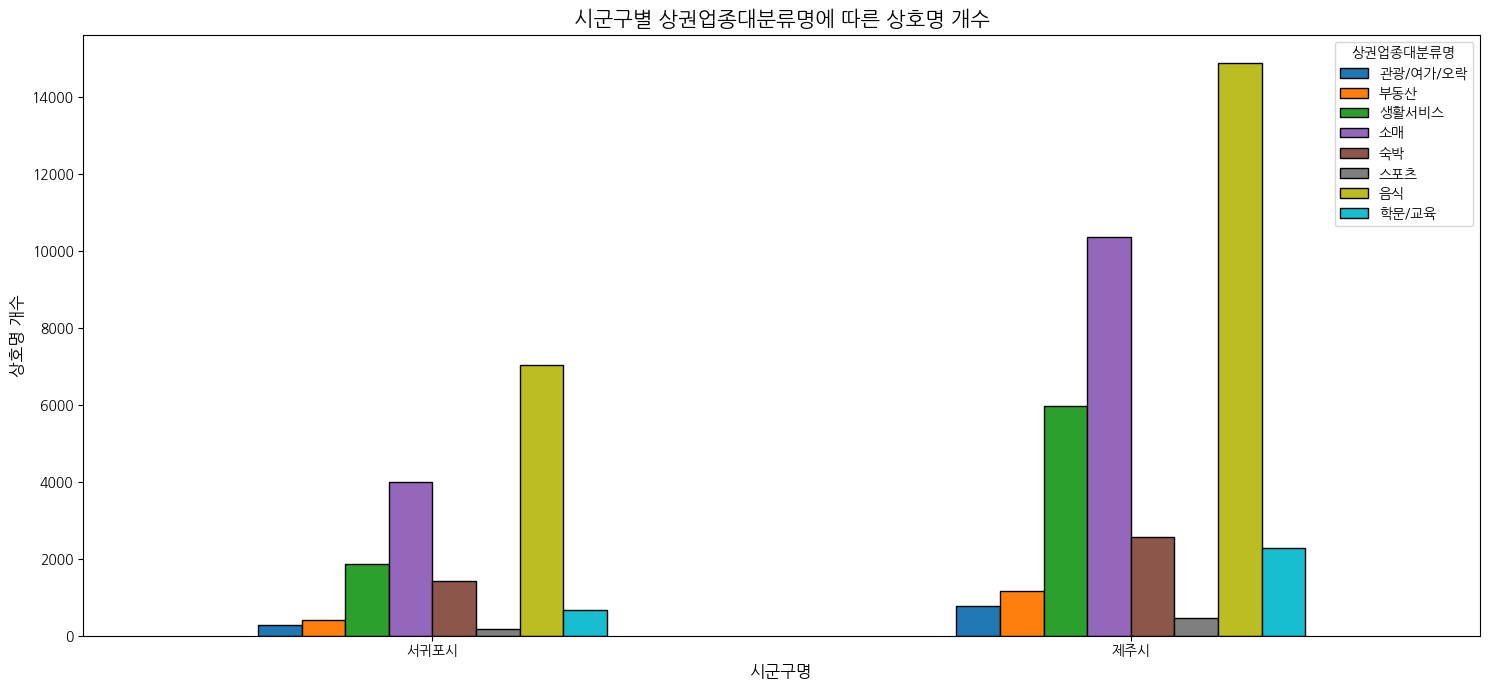

In [ ]:
# '시군구명'과 '상권업종대분류명' 별 '상호명'의 개수를 막대 그래프로 비교

city_business_counts.plot(kind='bar', figsize=(15, 7), colormap='tab10', edgecolor='black')
plt.title('시군구별 상권업종대분류명에 따른 상호명 개수', fontsize=15)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('상호명 개수', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

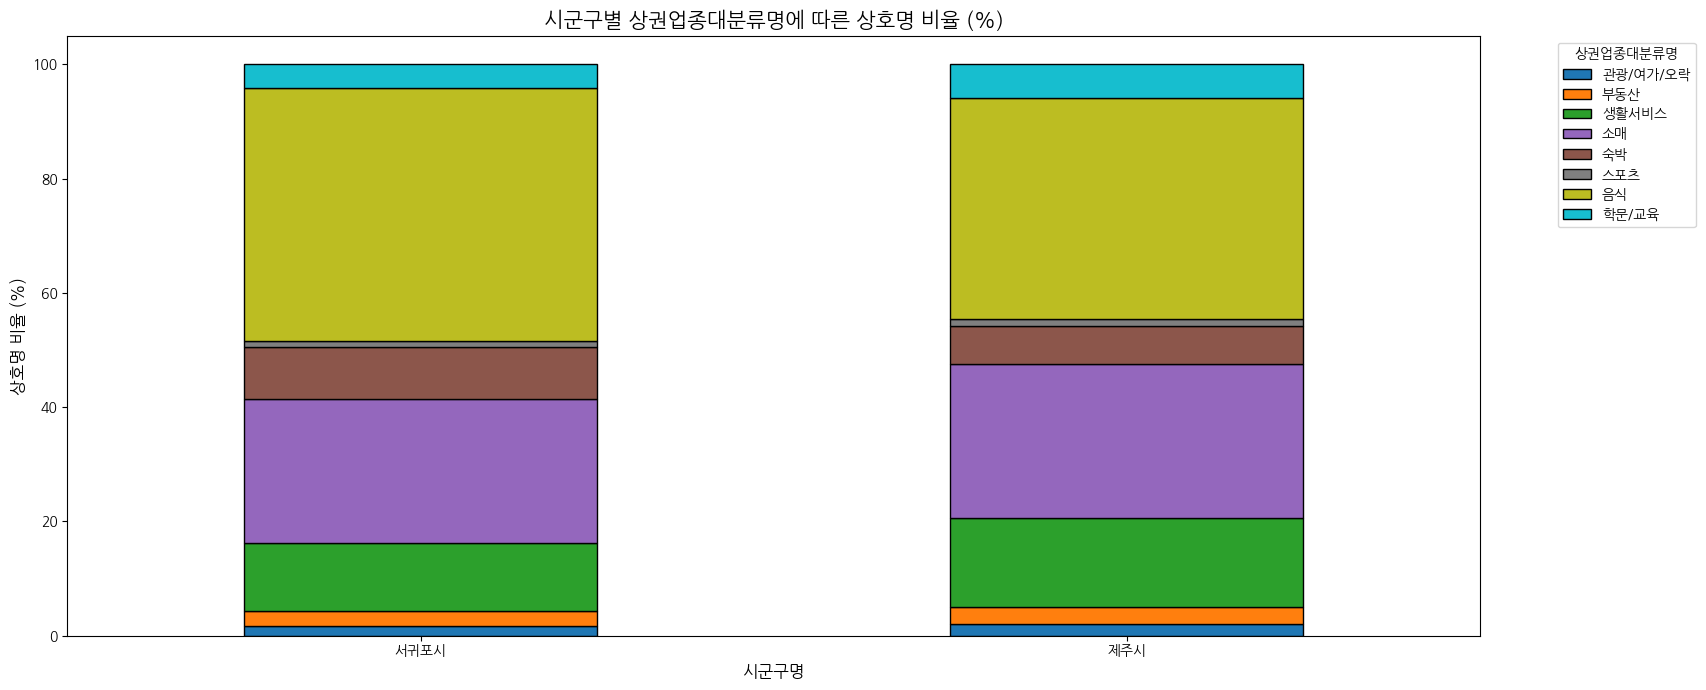

In [ ]:
# 각 시군구별로 상권업종대분류명의 비율 계산
city_business_ratio = city_business_counts.div(city_business_counts.sum(axis=1), axis=0) * 100

# 비율로 나타낸 데이터를 막대 그래프로 표현
city_business_ratio.plot(kind='bar', figsize=(15, 7), colormap='tab10', edgecolor='black', stacked=True)
plt.title('시군구별 상권업종대분류명에 따른 상호명 비율 (%)', fontsize=15)
plt.xlabel('시군구명', fontsize=12)
plt.ylabel('상호명 비율 (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='상권업종대분류명', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

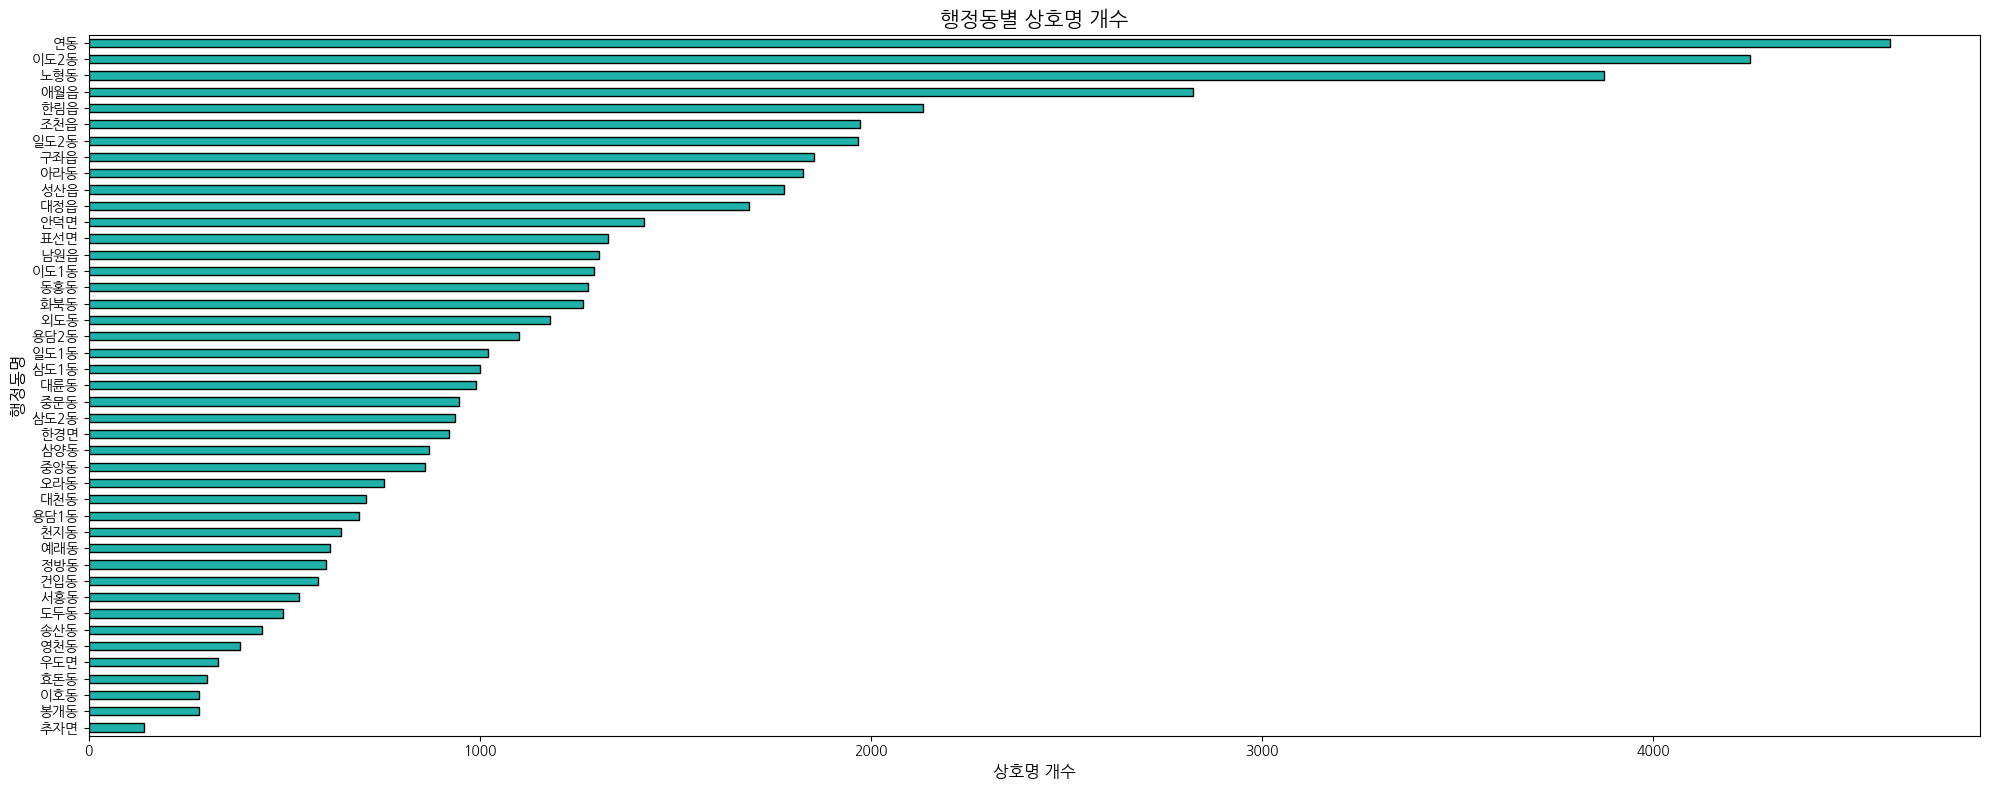

In [ ]:
# '행정동명'별로 '상호명'의 개수 집계
dong_counts = filtered_data_kr.groupby('행정동명')['상호명'].count()

# '행정동명'별 집계한 데이터를 막대 그래프로 표현
plt.figure(figsize=(20, 8))
dong_counts.sort_values(ascending=True).plot(kind='barh', color='lightseagreen', edgecolor='black')
plt.title('행정동별 상호명 개수', fontsize=15)
plt.xlabel('상호명 개수', fontsize=12)
plt.ylabel('행정동명', fontsize=12)
plt.tight_layout()

plt.show()

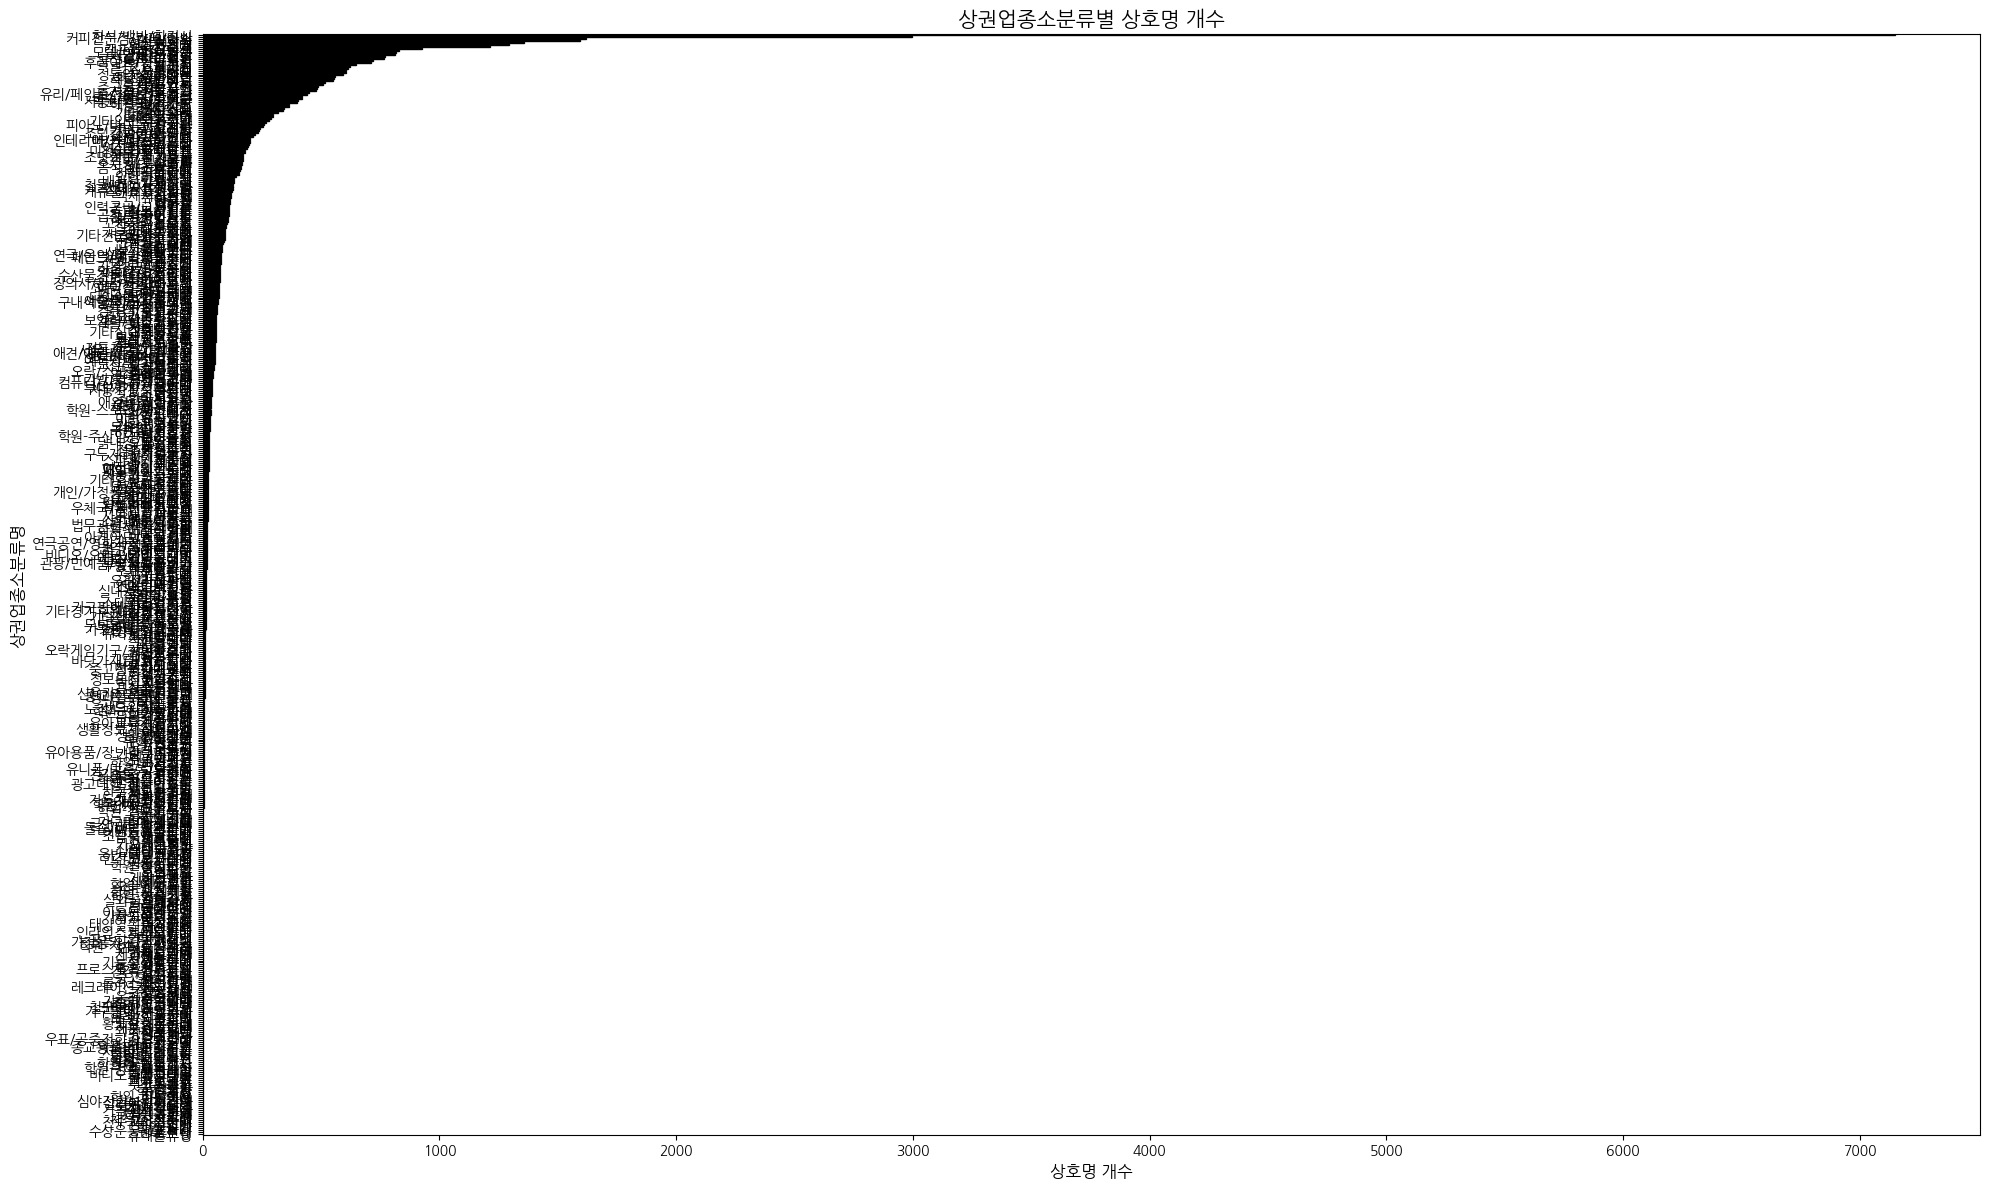

In [ ]:
# '상권업종소분류명'별로 '상호명'의 개수 집계
sub_business_counts = filtered_data_kr.groupby('상권업종소분류명')['상호명'].count()

# '상권업종소분류명'별 집계한 데이터를 막대 그래프로 표현
plt.figure(figsize=(20, 12))
sub_business_counts.sort_values(ascending=True).plot(kind='barh', color='mediumpurple', edgecolor='black')
plt.title('상권업종소분류별 상호명 개수', fontsize=15)
plt.xlabel('상호명 개수', fontsize=12)
plt.ylabel('상권업종소분류명', fontsize=12)
plt.tight_layout()

plt.show()


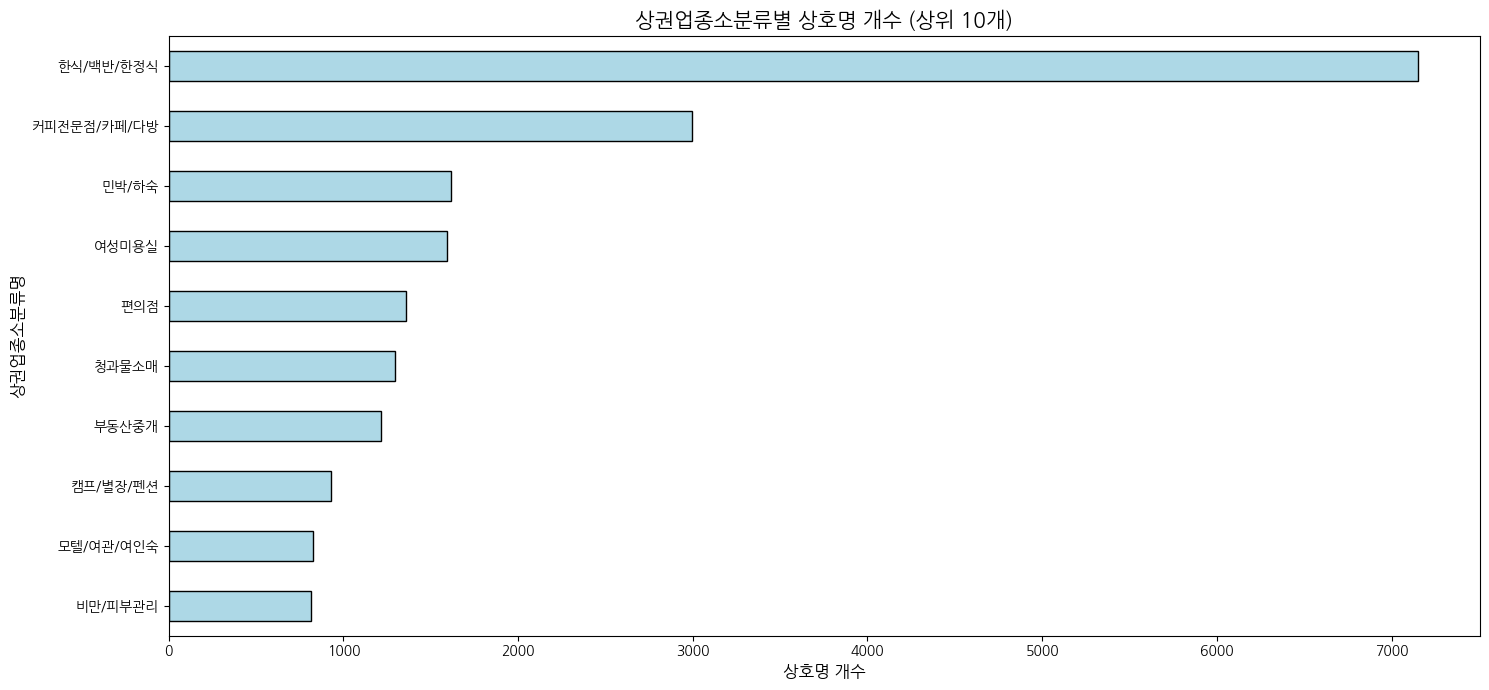

In [ ]:
# 상위 10개의 '상권업종소분류명'별 '상호명' 개수 선택
top_10_sub_business = sub_business_counts.sort_values(ascending=False).head(10)

# 상위 10개 '상권업종소분류명'별 집계한 데이터를 막대 그래프로 표현
plt.figure(figsize=(15, 7))
top_10_sub_business.sort_values().plot(kind='barh', color='lightblue', edgecolor='black')
plt.title('상권업종소분류별 상호명 개수 (상위 10개)', fontsize=15)
plt.xlabel('상호명 개수', fontsize=12)
plt.ylabel('상권업종소분류명', fontsize=12)
plt.tight_layout()

plt.show()

커피템플?!! 리마인드?

In [ ]:
# '커피템플' 상호를 가진 데이터 필터링
coffee_temple_data = filtered_data_kr[filtered_data_kr['상호명'].str.contains('커피템플', na=False, case=False)]


In [ ]:
coffee_temple_data

상가업소번호   상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
20602  16008471  커피템플         Q       음식       Q12   커피점/카페    Q12A01   

          상권업종소분류명  시도코드      시도명  ...                    지번주소         도로명코드  \
20602  커피전문점/카페/다방    50  제주특별자치도  ...  제주특별자치도 제주시 월평동 1348-3  501104848297   

                   도로명 건물본번지                     건물관리번호                도로명주소  \
20602  제주특별자치도 제주시 영평길   269  5011013500113480001057282  제주특별자치도 제주시 영평길 269   

        구우편번호    신우편번호          경도         위도  
20602  690130  63311.0  126.570302  33.478154  

[1 rows x 30 columns]

In [ ]:
# '커피템플'의 시와 동 정보 가져오기
coffee_temple_location = coffee_temple_data[['시군구명', '행정동명']].drop_duplicates()


In [ ]:
coffee_temple_location

시군구명 행정동명
20602  제주시  아라동

In [ ]:
# 해당 시와 동에 있는 '커피' 관련 상호의 개수 집계
coffee_shops_in_location = filtered_data_kr[
    (filtered_data_kr['시군구명'].isin(coffee_temple_location['시군구명'])) &
    (filtered_data_kr['행정동명'].isin(coffee_temple_location['행정동명'])) &
    (filtered_data_kr['상권업종소분류명'].str.contains('커피', na=False, case=False))
].groupby(['시군구명', '행정동명']).size()

coffee_temple_location, coffee_shops_in_location






(      시군구명 행정동명
 20602  제주시  아라동,
 시군구명  행정동명
 제주시   아라동     141
 dtype: int64)

In [ ]:
import folium
from folium.plugins import MarkerCluster

# 제주시 아라동의 커피 관련 상호 데이터 필터링
ara_coffee_shops = filtered_data_kr[
    (filtered_data_kr['시군구명'] == '제주시') &
    (filtered_data_kr['행정동명'] == '아라동') &
    (filtered_data_kr['상권업종소분류명'].str.contains('커피', na=False, case=False))
]

# 초기 지도 생성 (아라동 중심)
map_ara = folium.Map(location=[33.47889, 126.55028], zoom_start=15)

# MarkerCluster 추가
marker_cluster = MarkerCluster().add_to(map_ara)

# 각 상호의 위치에 마커 추가
for idx, row in ara_coffee_shops.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(icon='coffee', prefix='fa')
    ).add_to(marker_cluster)

map_ara


In [ ]:
# 커피템플의 위치 정보 가져오기
coffee_temple_location_data = ara_coffee_shops[ara_coffee_shops['상호명'].str.contains('커피템플', case=False)]
coffee_temple_lat = coffee_temple_location_data['위도'].values[0]
coffee_temple_lon = coffee_temple_location_data['경도'].values[0]

# 지도를 커피템플 중심으로 생성
map_ara_centered = folium.Map(location=[coffee_temple_lat, coffee_temple_lon], zoom_start=15)

# MarkerCluster 추가
marker_cluster_centered = MarkerCluster().add_to(map_ara_centered)

# 각 상호의 위치에 마커 추가
for idx, row in ara_coffee_shops.iterrows():
    icon_type = 'coffee'
    if row['상호명'] == '커피템플':
        icon_type = 'star'
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(icon=icon_type, prefix='fa', color='red' if icon_type == 'star' else 'blue')
    ).add_to(marker_cluster_centered)

map_ara_centered


# 카페 창업하기!

우리가 제주도에서 커피를 창업하기 위해서 입지를 어떻게 분석해야할지 해봅시다!

커피템플은 공항 주변에 2호점을 낸다고 하죠? 제주공항은 연동이라는 곳인데요.

그 주변에 커피관련업종이 몇개가 있는지 한번 알아봅시다.

In [ ]:
# 연동에 위치한 커피 관련 상호 데이터 필터링
yeon_dong_coffee_shops = filtered_data_kr[
    (filtered_data_kr['시군구명'] == '제주시') &
    (filtered_data_kr['행정동명'] == '연동') &
    (filtered_data_kr['상권업종소분류명'].str.contains('커피', na=False, case=False))
]

In [ ]:
# 지도를 연동 중심으로 생성
map_yeon_dong = folium.Map(location=[33.489011, 126.493088], zoom_start=15)

# MarkerCluster 추가
marker_cluster_yeon_dong = MarkerCluster().add_to(map_yeon_dong)

# 각 상호의 위치에 마커 추가
for idx, row in yeon_dong_coffee_shops.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(icon='coffee', prefix='fa')
    ).add_to(marker_cluster_yeon_dong)

map_yeon_dong

관광지인 경우 주변에 편의점 등 무언가를 구매할 수 있는 접근성도 무시할 수는 없는데요. 가장 쉬운 편의점이 주변에 있는지 판단해보도록 하죠

In [ ]:
# 원하는 상권업종소분류명 리스트 생성
target_sub_business = ['편의점', '종합소매']

# 해당 상권업종소분류명에 해당하는 데이터 집계
target_counts = filtered_data_kr[filtered_data_kr['상권업종소분류명'].isin(target_sub_business)].groupby('상권업종소분류명').size()

target_counts

상권업종소분류명
종합소매     339
편의점     1357
dtype: int64

In [ ]:
# 원하는 상권업종소분류명에 해당하는 데이터 필터링
target_shops = filtered_data_kr[filtered_data_kr['상권업종소분류명'].isin(target_sub_business)]

# 지도를 제주도 중심으로 생성
map_target = folium.Map(location=[33.489011, 126.493088], zoom_start=10)

# MarkerCluster 추가
marker_cluster_target = MarkerCluster().add_to(map_target)

# 각 상호의 위치에 마커 추가
for idx, row in target_shops.iterrows():
    icon_color = 'blue' if row['상권업종소분류명'] == '종합소매' else 'green'
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(color=icon_color)
    ).add_to(marker_cluster_target)

map_target

In [ ]:
# 모두 다른표시로 나타내기

In [ ]:
# 연동에서 원하는 상권업종소분류명에 해당하는 데이터 필터링 (주유소 추가)
target_sub_business_extended = ['편의점', '종합소매', '주유소']
yeon_dong_extended_shops = filtered_data_kr[
    (filtered_data_kr['행정동명'] == '연동') &
    (filtered_data_kr['상권업종소분류명'].isin(target_sub_business_extended))
]

# 지도를 연동 중심으로 다시 생성
map_yeon_dong_extended = folium.Map(location=[33.489011, 126.493088], zoom_start=15)

# 각 상호의 위치에 다른 색상의 마커로 표시
for idx, row in yeon_dong_extended_shops.iterrows():
    if row['상권업종소분류명'] == '편의점':
        icon_color, icon_symbol = 'green', 'shopping-cart'
    elif row['상권업종소분류명'] == '종합소매':
        icon_color, icon_symbol = 'blue', 'store'
    elif row['상권업종소분류명'] == '커피':
        icon_color, icon_symbol = 'red', 'coffee'
    else:  # 주유소
        icon_color, icon_symbol = 'black', 'tint'

    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(color=icon_color, icon=icon_symbol, prefix='fa')
    ).add_to(map_yeon_dong_extended)

map_yeon_dong_extended


In [ ]:
# 그러면 연동에 어디에 커피전문점을 세우면 좋을까요?

거리기반 위치 찾기

In [ ]:
# 연동에서 '편의점', '마트', '주유소'에 해당하는 데이터 필터링
target_business_types = ['편의점', '종합소매', '주유소']
yeon_dong_target_data = filtered_data_kr[
    (filtered_data_kr['행정동명'] == '연동') &
    (filtered_data_kr['상권업종소분류명'].isin(target_business_types))
]

# 각 상점 유형의 중심점(평균 좌표) 계산
avg_coords = yeon_dong_target_data.groupby('상권업종소분류명')[['위도', '경도']].mean()

# 중심점들의 중간 지점 계산
avg_lat = avg_coords['위도'].mean()
avg_lon = avg_coords['경도'].mean()

avg_lat, avg_lon


(33.48654166971545, 126.49271382838958)

다음으로 밀도 기반 클러스터링을 사용하여 가장 많은 상점이 모여 있는 지역을 찾아보겠습니다. 이를 위해 DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 알고리즘을 사용하겠습니다.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 데이터의 좌표만 추출
coords = yeon_dong_target_data[['위도', '경도']].values

# 스케일링 (거리 계산을 위해)
scaled_coords = StandardScaler().fit_transform(coords)

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.05, min_samples=5).fit(scaled_coords)  # eps는 이웃을 정의하기 위한 거리, min_samples는 클러스터를 형성하기 위한 최소 샘플 수
labels = dbscan.labels_

# 클러스터링 결과를 데이터프레임에 추가
yeon_dong_target_data['cluster'] = labels

# 가장 큰 클러스터를 찾고 그 중심점 계산
largest_cluster = yeon_dong_target_data[yeon_dong_target_data['cluster'] == labels.max()]
center_of_largest_cluster = largest_cluster[['위도', '경도']].mean()

center_of_largest_cluster


위도     33.486314
경도    126.491330
dtype: float64

In [ ]:
import folium

# 지도 생성
map_yeon_dong = folium.Map(location=[33.489011, 126.493088], zoom_start=15)

# 거리 기반 계산으로 얻은 위치 표시
folium.Marker(
    location=[avg_lat, avg_lon],
    popup='거리 기반 중심점',
    icon=folium.Icon(color='blue')
).add_to(map_yeon_dong)

# 밀도 기반 클러스터링으로 얻은 위치 표시
folium.Marker(
    location=[center_of_largest_cluster['위도'], center_of_largest_cluster['경도']],
    popup='밀도 기반 클러스터 중심점',
    icon=folium.Icon(color='red')
).add_to(map_yeon_dong)

map_yeon_dong


In [ ]:
제주시 연동 내에서 두 가지 방법을 통해 선정된 위치를 지도에 표시하였습니다:

파란색 마커: 거리 기반 계산으로 선정된 위치
빨간색 마커: 밀도 기반 클러스터링(DBSCAN)으로 선정된 위치
두 위치는 매우 가까우며, 이는 연동 내에서 '편의점', '마트', '주유소'가 밀집되어 있는 지역의 중심점을 나타냅니다.

In [ ]:
# '편의점', '마트', '주유소'의 목록을 다시 설정
target_sub_business_extended = ['편의점', '종합소매', '주유소']

# 연동에서 원하는 상권업종소분류명에 해당하는 데이터 필터링
yeon_dong_extended_shops = filtered_data_kr[
    (filtered_data_kr['행정동명'] == '연동') &
    (filtered_data_kr['상권업종소분류명'].isin(target_sub_business_extended))
]

# 지도를 연동 중심으로 다시 생성
map_yeon_dong_extended = folium.Map(location=[33.489011, 126.493088], zoom_start=15)

# 각 상호의 위치에 다른 색상의 마커로 표시
for idx, row in yeon_dong_extended_shops.iterrows():
    if row['상권업종소분류명'] == '편의점':
        icon_color, icon_symbol = 'green', 'shopping-cart'
    elif row['상권업종소분류명'] == '종합소매':
        icon_color, icon_symbol = 'blue', 'store'
    elif row['상권업종소분류명'] == '주유소':
        icon_color, icon_symbol = 'black', 'tint'

    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(color=icon_color, icon=icon_symbol, prefix='fa')
    ).add_to(map_yeon_dong_extended)

# 거리 기반 계산으로 얻은 위치를 지도에 추가
folium.Marker(
    location=[avg_lat, avg_lon],
    popup='거리 기반 중심점',
    icon=folium.Icon(color='blue')
).add_to(map_yeon_dong_extended)

# 밀도 기반 클러스터링으로 얻은 위치를 지도에 추가
folium.Marker(
    location=[center_of_largest_cluster['위도'], center_of_largest_cluster['경도']],
    popup='밀도 기반 클러스터 중심점',
    icon=folium.Icon(color='red')
).add_to(map_yeon_dong_extended)

map_yeon_dong_extended

In [ ]:
# 연동에 위치한 커피 관련 상호 데이터 필터링
yeon_dong_coffee_shops = filtered_data_kr[
    (filtered_data_kr['시군구명'] == '제주시') &
    (filtered_data_kr['행정동명'] == '연동') &
    (filtered_data_kr['상권업종소분류명'].str.contains('커피', na=False, case=False))
]

# 커피 관련 상호 위치를 지도에 표시
for idx, row in yeon_dong_coffee_shops.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(color='purple', icon='coffee', prefix='fa')
    ).add_to(map_yeon_dong_extended)

map_yeon_dong_extended
